## Hotel Reservations cancellation predection

#### Dataset description

The dataset contains detailed information about hotel reservations, where each record is identified by a unique Booking_ID. It includes guest composition details such as the number of adults and children, along with stay patterns like the number of weekend nights and weeknights booked. Customer preferences are captured through variables such as meal type, required car parking spaces, and the number of special requests made. Booking behavior is reflected in features like lead time (the number of days between booking and arrival), arrival year, month, and date, as well as the market segment through which the booking was made. The dataset also tracks customer history, including whether the guest is a repeated visitor, the number of previous cancellations, and prior bookings that were not canceled. Financial information is represented by the average price per room per day. Finally, the target variable, booking_status, indicates whether the reservation was canceled or successfully completed, making the dataset suitable for predictive modeling and analysis of booking cancellation behavior.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Hotel Reservations.csv")

In [3]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [5]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

### EDA 

#### Target Distribution

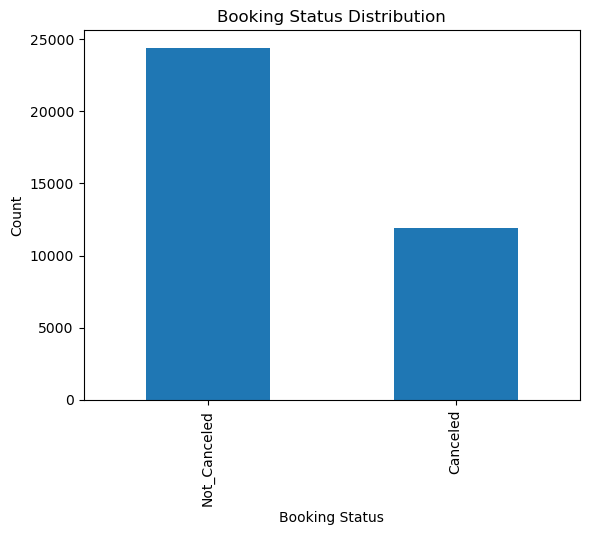

In [6]:
plt.figure()
data['booking_status'].value_counts().plot(kind='bar')
plt.title("Booking Status Distribution")
plt.xlabel("Booking Status")
plt.ylabel("Count")
plt.show()

Analyzing the distribution of the target variable (booking_status) helps identify class imbalance. This is important because an imbalanced dataset can bias machine learning models.

#### Numerical Features vs Booking Status

<Figure size 1200x600 with 0 Axes>

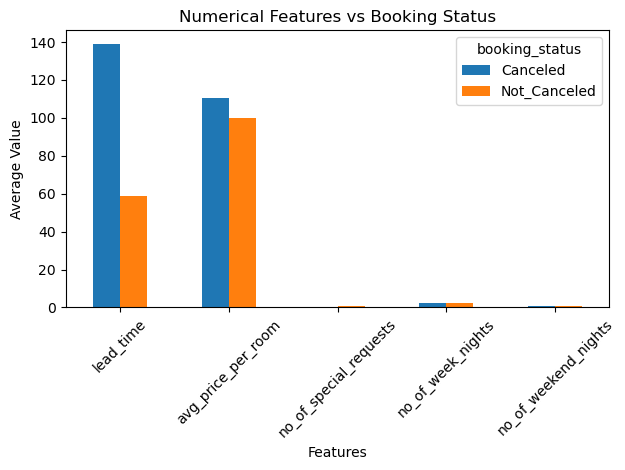

In [7]:
# Numerical columns
num_cols = [
    'lead_time',
    'avg_price_per_room',
    'no_of_special_requests',
    'no_of_week_nights',
    'no_of_weekend_nights'
]

# Calculate mean values
num_vs_status = data.groupby('booking_status')[num_cols].mean().T

# Single combined plot
plt.figure(figsize=(12,6))
num_vs_status.plot(kind='bar')

plt.title("Numerical Features vs Booking Status")
plt.xlabel("Features")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This analysis compares the average numerical values across canceled and non-canceled bookings. It helps identify behavioral patterns such as whether higher lead time or pricing affects cancellation likelihood.

#### Distribution of Numerical Features

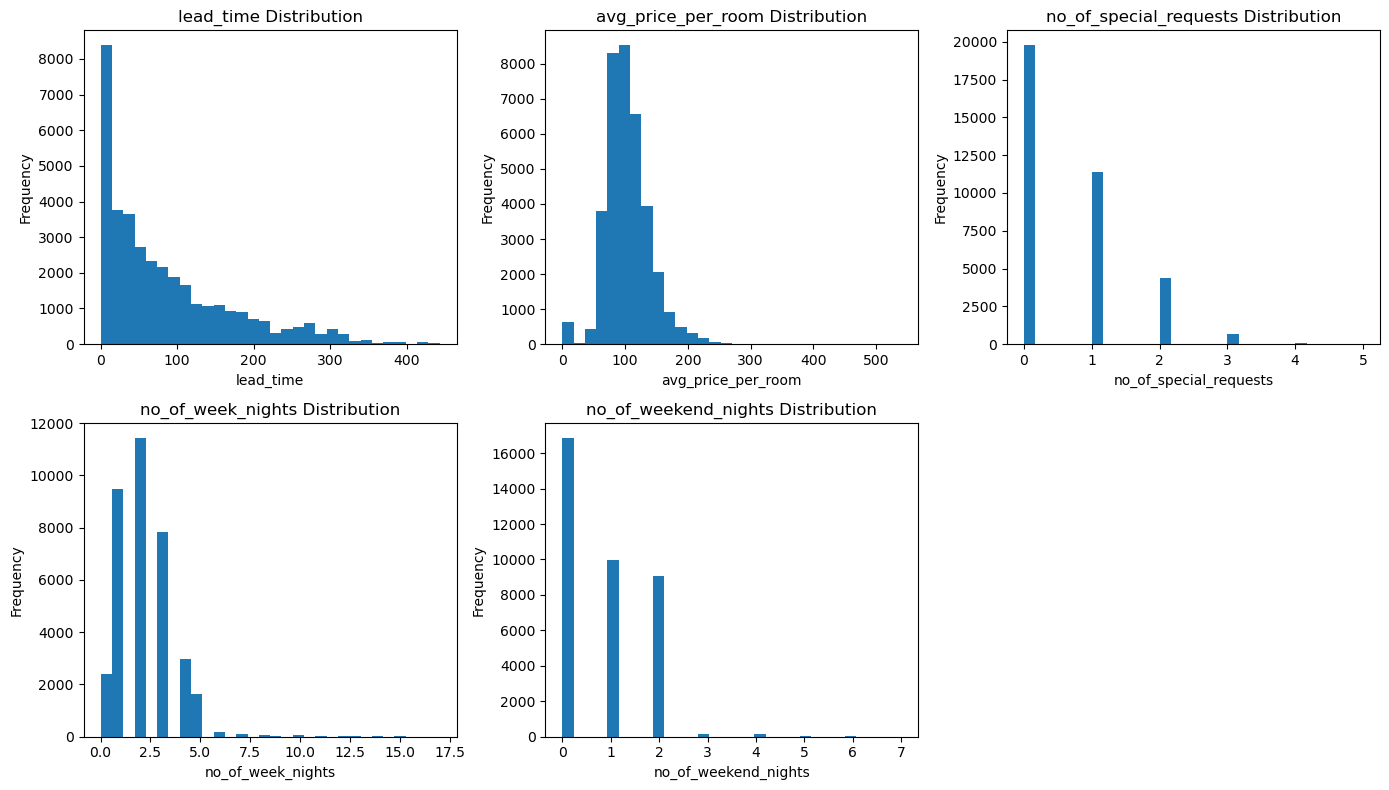

In [11]:
# Numerical columns
num_cols = [
    'lead_time',
    'avg_price_per_room',
    'no_of_special_requests',
    'no_of_week_nights',
    'no_of_weekend_nights'
]

# Create collage layout
fig, axes = plt.subplots(2, 3, figsize=(14,8))
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(num_cols):
    axes[i].hist(data[col], bins=30)
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Remove empty extra subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

Histogram plots are used to understand data distribution, skewness, and the presence of extreme values. This helps decide whether transformations or scaling may be required later.

#### Categorical Features vs Booking Status

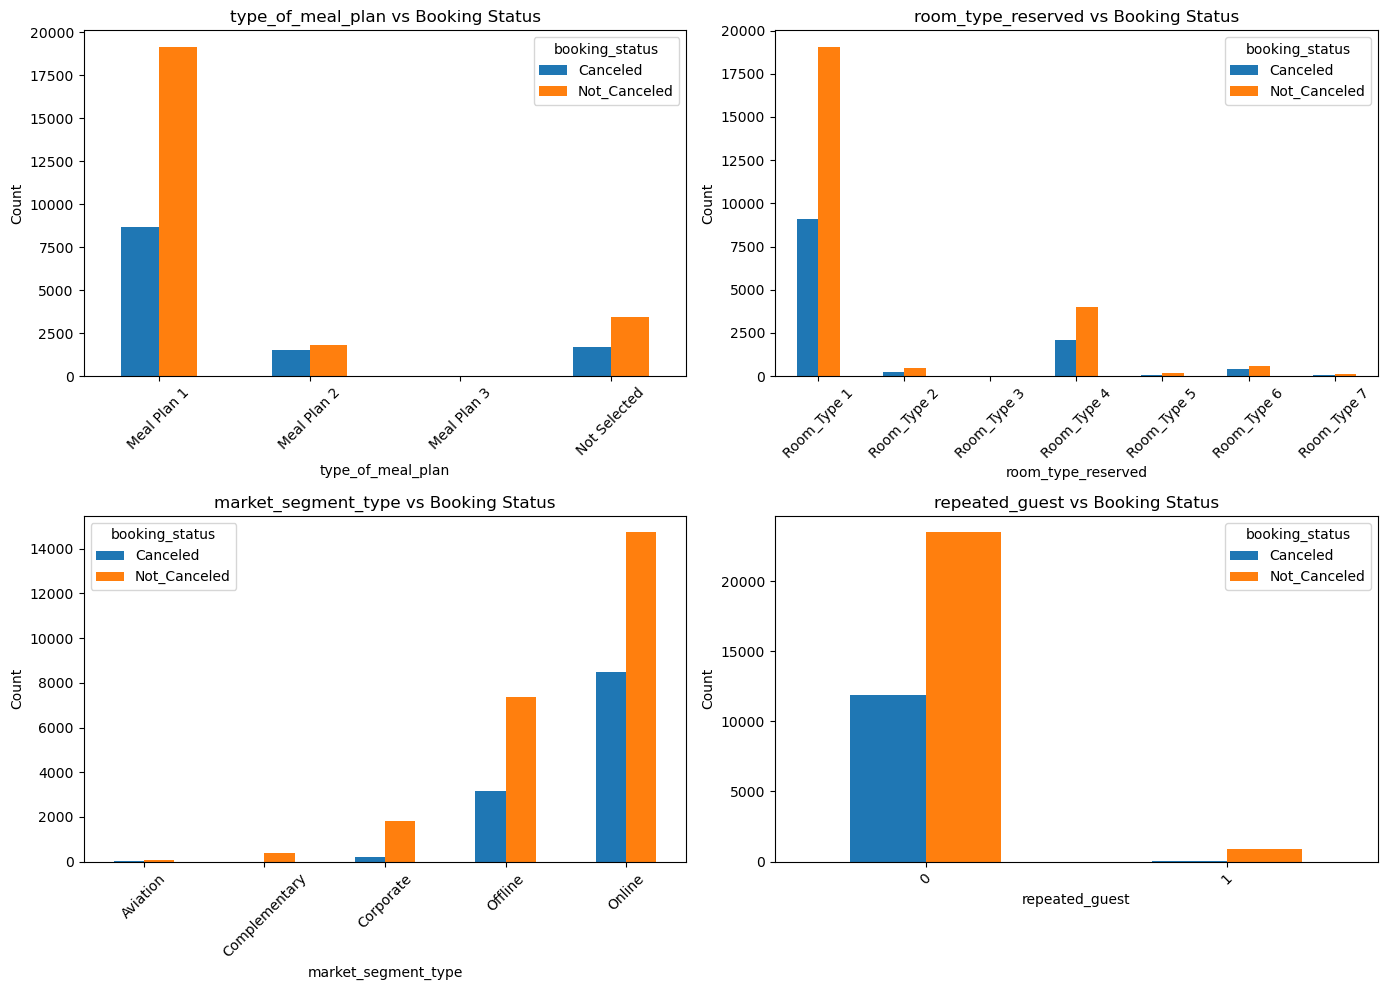

In [12]:
# Categorical columns
cat_cols = [
    'type_of_meal_plan',
    'room_type_reserved',
    'market_segment_type',
    'repeated_guest'
]

# Create subplot layout
fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()

# Plot each categorical feature
for i, col in enumerate(cat_cols):
    ct = pd.crosstab(data[col], data['booking_status'])
    ct.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"{col} vs Booking Status")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Categorical variables such as meal plan, room type, and market segment often strongly influence cancellations. Cross-tabulation helps visualize how categories relate to booking outcomes.

#### Correlation Matrix

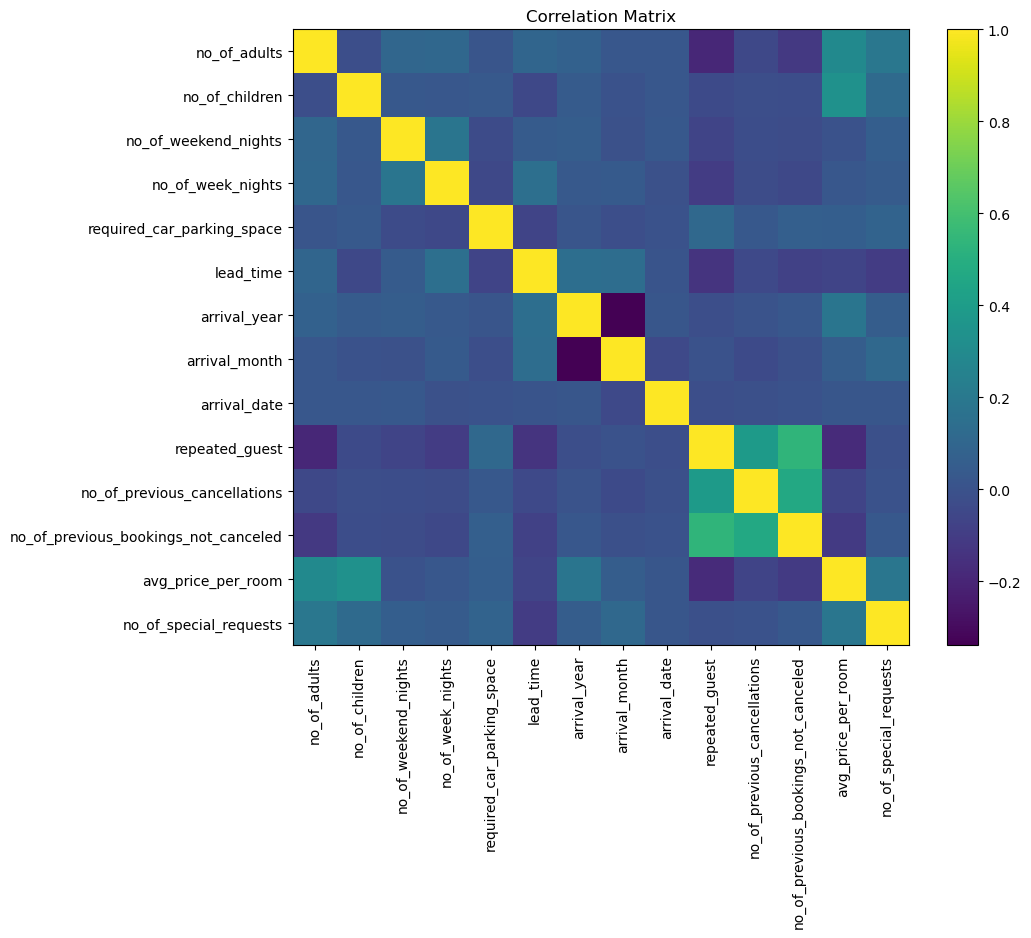

In [13]:
plt.figure(figsize=(10,8))
corr = data.corr(numeric_only=True)

plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()

Correlation analysis identifies relationships between numerical variables. Highly correlated features may indicate redundancy, while strong correlations with target-related variables can signal important predictors.

#### Feature Engineering — Total Nights

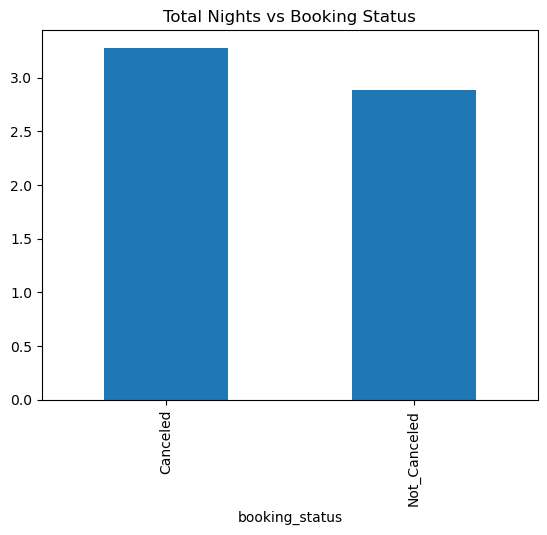

In [15]:
data['total_nights'] = data['no_of_week_nights'] + data['no_of_weekend_nights']

plt.figure()
data.groupby('booking_status')['total_nights'].mean().plot(kind='bar')
plt.title("Total Nights vs Booking Status")
plt.show()

Combining weekday and weekend nights into a new feature (total_nights) provides a clearer measure of stay duration. Feature engineering like this often improves model performance.

### EDA Conclusion

The exploratory analysis shows that booking cancellations are driven more by behavioral signals than by simple demographic variables. Lead time stands out as a primary risk indicator — reservations made far in advance demonstrate noticeably different patterns compared to last-minute bookings, suggesting higher uncertainty and flexibility in customer intent. Pricing and stay duration also influence outcomes, where certain price ranges and longer planning horizons correlate with increased cancellation likelihood.

Customer commitment indicators reduce risk. Bookings with more special requests and repeated guests consistently show stronger retention behavior, implying that engagement level and prior relationship with the hotel are meaningful predictors. Market segment and room selection further segment cancellation patterns, indicating that acquisition channel and product positioning affect booking reliability.

From a modeling perspective, the dataset is structurally clean and feature-rich, enabling strong predictive potential without heavy preprocessing. However, the presence of class imbalance means evaluation should prioritize recall, precision, and F1-score rather than accuracy alone. Feature engineering steps such as aggregating stay duration and transforming skewed variables are likely to improve model stability.

Overall, the EDA confirms that cancellation behavior is influenced by booking timing, customer intent signals, and market segmentation, providing a clear direction for building a robust classification model focused on risk prediction rather than simple trend analysis.

### Feature Engineering

In [17]:
data_model = data.drop(columns=['Booking_ID'])

# Create new feature
data_model['total_nights'] = (
    data_model['no_of_week_nights'] +
    data_model['no_of_weekend_nights']
)

# Split features and target
X = data_model.drop('booking_status', axis=1)
y = data_model['booking_status']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Encode target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### Model Selection

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

lr.fit(X_train_scaled, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Performance Evaluation

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    "Logistic Regression": lr.predict(X_test_scaled),
    "Decision Tree": dt.predict(X_test),
    "Random Forest": rf.predict(X_test)
}

for name, preds in models.items():
    print("\n", name)
    print("Accuracy:", accuracy_score(y_test, preds))
    print(confusion_matrix(y_test, preds))
    print(classification_report(y_test, preds))


 Logistic Regression
Accuracy: 0.8125430737422468
[[1514  863]
 [ 497 4381]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69      2377
           1       0.84      0.90      0.87      4878

    accuracy                           0.81      7255
   macro avg       0.79      0.77      0.78      7255
weighted avg       0.81      0.81      0.81      7255


 Decision Tree
Accuracy: 0.8749827705031014
[[1949  428]
 [ 479 4399]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      2377
           1       0.91      0.90      0.91      4878

    accuracy                           0.87      7255
   macro avg       0.86      0.86      0.86      7255
weighted avg       0.88      0.87      0.88      7255


 Random Forest
Accuracy: 0.9094417643004824
[[1966  411]
 [ 246 4632]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      2377
           1   

#### Train vs Test Accuracy Check

In [20]:
from sklearn.metrics import accuracy_score

# Predictions
lr_train_pred = lr.predict(X_train_scaled)
lr_test_pred  = lr.predict(X_test_scaled)

dt_train_pred = dt.predict(X_train)
dt_test_pred  = dt.predict(X_test)

rf_train_pred = rf.predict(X_train)
rf_test_pred  = rf.predict(X_test)

# Accuracy comparison
print("\nLogistic Regression")
print("Train Accuracy:", accuracy_score(y_train, lr_train_pred))
print("Test Accuracy :", accuracy_score(y_test, lr_test_pred))

print("\nDecision Tree")
print("Train Accuracy:", accuracy_score(y_train, dt_train_pred))
print("Test Accuracy :", accuracy_score(y_test, dt_test_pred))

print("\nRandom Forest")
print("Train Accuracy:", accuracy_score(y_train, rf_train_pred))
print("Test Accuracy :", accuracy_score(y_test, rf_test_pred))


Logistic Regression
Train Accuracy: 0.8044452101998621
Test Accuracy : 0.8125430737422468

Decision Tree
Train Accuracy: 0.9941764300482426
Test Accuracy : 0.8749827705031014

Random Forest
Train Accuracy: 0.9941764300482426
Test Accuracy : 0.9094417643004824


#### Train vs Test Accuracy Graph

<Figure size 1000x600 with 0 Axes>

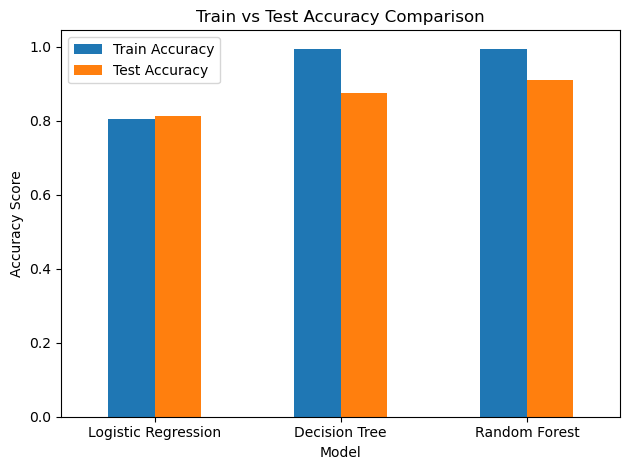

In [21]:
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# Accuracy values
accuracy_data = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Train Accuracy": [
        accuracy_score(y_train, lr.predict(X_train_scaled)),
        accuracy_score(y_train, dt.predict(X_train)),
        accuracy_score(y_train, rf.predict(X_train))
    ],
    "Test Accuracy": [
        accuracy_score(y_test, lr.predict(X_test_scaled)),
        accuracy_score(y_test, dt.predict(X_test)),
        accuracy_score(y_test, rf.predict(X_test))
    ]
}

acc_df = pd.DataFrame(accuracy_data).set_index("Model")

# Plot graph
plt.figure(figsize=(10,6))
acc_df.plot(kind='bar')

plt.title("Train vs Test Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Hyperparameter Tuning — Logistic Regression

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

lr_grid = GridSearchCV(
    LogisticRegression(),
    lr_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

lr_grid.fit(X_train_scaled, y_train)

print("Best Params:", lr_grid.best_params_)
print("Best Score :", lr_grid.best_score_)

best_lr = lr_grid.best_estimator_

Best Params: {'C': 1, 'max_iter': 1000, 'solver': 'lbfgs'}
Best Score : 0.8039627842866988


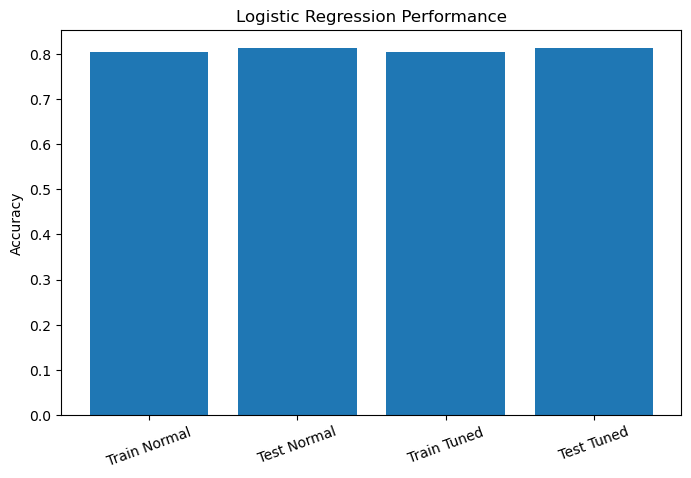

In [37]:
# ====================================
# LOGISTIC REGRESSION CLEAR GRAPH
# ====================================

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

labels = ["Train Normal","Test Normal","Train Tuned","Test Tuned"]

values = [
    accuracy_score(y_train, lr.predict(X_train_scaled)),
    accuracy_score(y_test, lr.predict(X_test_scaled)),
    accuracy_score(y_train, best_lr.predict(X_train_scaled)),
    accuracy_score(y_test, best_lr.predict(X_test_scaled))
]

plt.figure(figsize=(8,5))
plt.bar(labels, values)

plt.title("Logistic Regression Performance")
plt.ylabel("Accuracy")
plt.xticks(rotation=20)
plt.show()

#### Hyperparameter Tuning — Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt_params = {
    'max_depth': [3,5,10,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

dt_grid.fit(X_train, y_train)

print("Best Params:", dt_grid.best_params_)
print("Best Score :", dt_grid.best_score_)

best_dt = dt_grid.best_estimator_

Best Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score : 0.8685733976567885


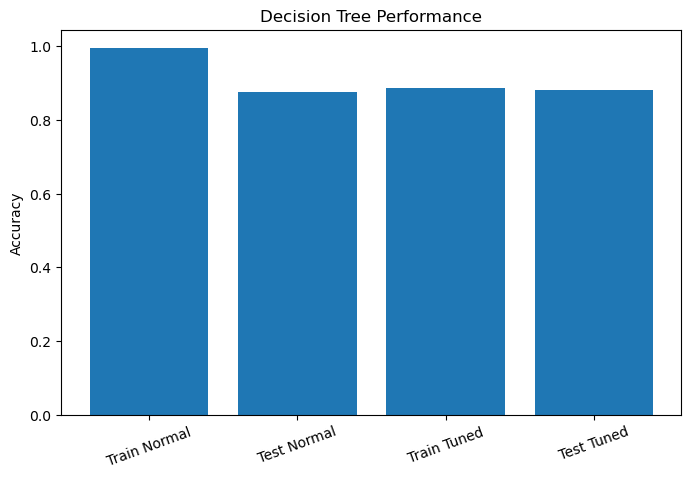

In [38]:
labels = ["Train Normal","Test Normal","Train Tuned","Test Tuned"]

values = [
    accuracy_score(y_train, dt.predict(X_train)),
    accuracy_score(y_test, dt.predict(X_test)),
    accuracy_score(y_train, best_dt.predict(X_train)),
    accuracy_score(y_test, best_dt.predict(X_test))
]

plt.figure(figsize=(8,5))
plt.bar(labels, values)

plt.title("Decision Tree Performance")
plt.ylabel("Accuracy")
plt.xticks(rotation=20)
plt.show()

#### Hyperparameter Tuning — Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_params = {
    'n_estimators': [100,200],
    'max_depth': [None,10,20],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

print("Best Params:", rf_grid.best_params_)
print("Best Score :", rf_grid.best_score_)

best_rf = rf_grid.best_estimator_

Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Score : 0.8989317711922812


#### Evaluate Tuned Models — Train & Test Accuracy

In [25]:
from sklearn.metrics import accuracy_score

models_tuned = {
    "Logistic Regression Tuned": (
        best_lr.predict(X_train_scaled),
        best_lr.predict(X_test_scaled)
    ),
    "Decision Tree Tuned": (
        best_dt.predict(X_train),
        best_dt.predict(X_test)
    ),
    "Random Forest Tuned": (
        best_rf.predict(X_train),
        best_rf.predict(X_test)
    )
}

for name, (train_preds, test_preds) in models_tuned.items():
    print("\n", name)
    print("Train Accuracy:", accuracy_score(y_train, train_preds))
    print("Test Accuracy :", accuracy_score(y_test, test_preds))


 Logistic Regression Tuned
Train Accuracy: 0.8044452101998621
Test Accuracy : 0.8125430737422468

 Decision Tree Tuned
Train Accuracy: 0.8869055823569951
Test Accuracy : 0.8806340454858718

 Random Forest Tuned
Train Accuracy: 0.9764645072363887
Test Accuracy : 0.9087525844245348


#### Train vs Test Accuracy — Tuned Models (Graph)

<Figure size 1000x600 with 0 Axes>

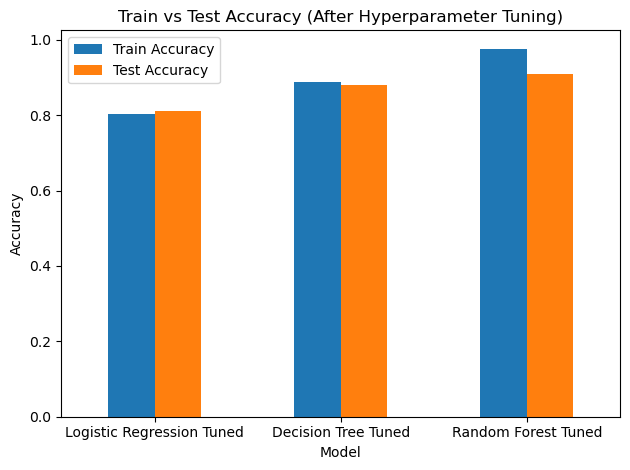

In [26]:
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# Accuracy calculation
tuned_accuracy = {
    "Model": [
        "Logistic Regression Tuned",
        "Decision Tree Tuned",
        "Random Forest Tuned"
    ],
    "Train Accuracy": [
        accuracy_score(y_train, best_lr.predict(X_train_scaled)),
        accuracy_score(y_train, best_dt.predict(X_train)),
        accuracy_score(y_train, best_rf.predict(X_train))
    ],
    "Test Accuracy": [
        accuracy_score(y_test, best_lr.predict(X_test_scaled)),
        accuracy_score(y_test, best_dt.predict(X_test)),
        accuracy_score(y_test, best_rf.predict(X_test))
    ]
}

tuned_acc_df = pd.DataFrame(tuned_accuracy).set_index("Model")

# Plot graph
plt.figure(figsize=(10,6))
tuned_acc_df.plot(kind='bar')

plt.title("Train vs Test Accuracy (After Hyperparameter Tuning)")
plt.ylabel("Accuracy")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Better Hyperparameter Tuning for randomforest 

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_params = {
    'n_estimators': [200,300],
    'max_depth': [8,10,12],          # LIMIT TREE DEPTH
    'min_samples_split': [5,10,15],  # FORCE STRONGER SPLITS
    'min_samples_leaf': [2,4,6],     # PREVENT SMALL LEAVES
    'max_features': ['sqrt']         # REDUCE FEATURE OVERUSE
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_
print(rf_grid.best_params_)

{'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
train_pred = best_rf.predict(X_train)
test_pred  = best_rf.predict(X_test)
print("Train Accuracy:", accuracy_score(y_train, train_pred))
print("Test Accuracy :", accuracy_score(y_test, test_pred))

Train Accuracy: 0.8909717436250861
Test Accuracy : 0.8853204686423156


In [33]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, test_pred))
print("\nClassification Report:\n", classification_report(y_test, test_pred))


Confusion Matrix:
 [[1835  542]
 [ 290 4588]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.77      0.82      2377
           1       0.89      0.94      0.92      4878

    accuracy                           0.89      7255
   macro avg       0.88      0.86      0.87      7255
weighted avg       0.88      0.89      0.88      7255



#### Normal vs Tuned Random Forest — Comparison Graph

<Figure size 1000x600 with 0 Axes>

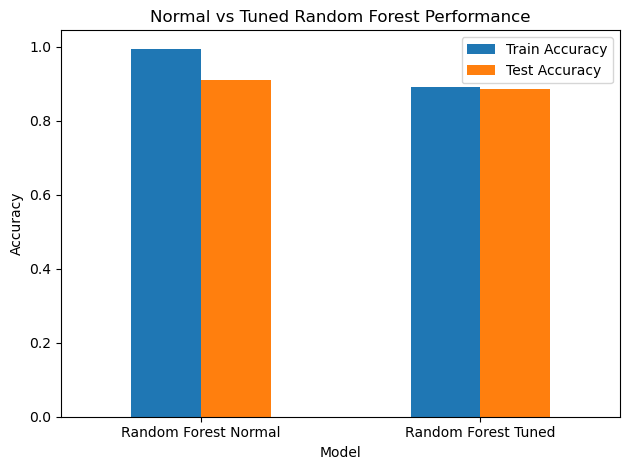

In [39]:
comparison = {
    "Model": ["Random Forest Normal", "Random Forest Tuned"],
    "Train Accuracy": [
        accuracy_score(y_train, rf.predict(X_train)),
        accuracy_score(y_train, best_rf.predict(X_train))
    ],
    "Test Accuracy": [
        accuracy_score(y_test, rf.predict(X_test)),
        accuracy_score(y_test, best_rf.predict(X_test))
    ]
}

compare_df = pd.DataFrame(comparison).set_index("Model")

# Plot
plt.figure(figsize=(10,6))
compare_df.plot(kind='bar')

plt.title("Normal vs Tuned Random Forest Performance")
plt.ylabel("Accuracy")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Confusion Matrix Graph

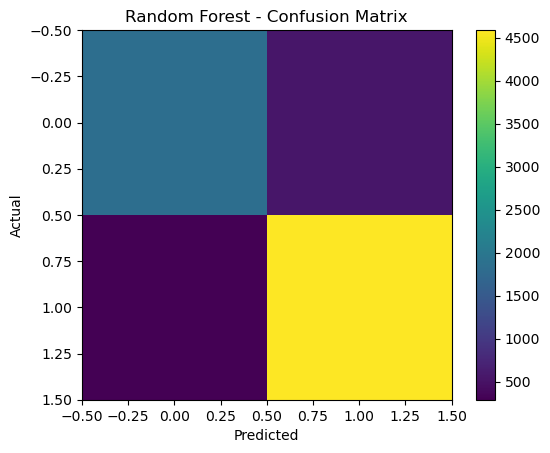

In [29]:
import matplotlib.pyplot as plt

plt.figure()
cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

#### Feature Importance

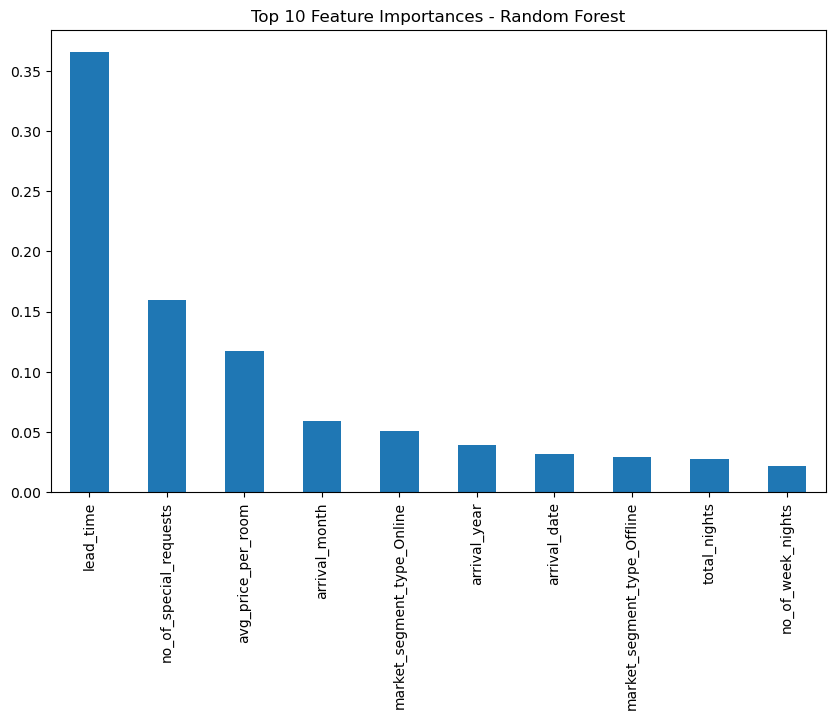

In [30]:
import pandas as pd

feature_importance = pd.Series(
    best_rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feature_importance.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()